# Second Order ODEs in Python

Our last assignment consisted of a series of first order ODEs. This assignment will be similarly structured; however, you will be using the same techniques to solve second order ODEs. In particular, the examples I will give will be for a damped spring-mass system and coupled spring mass system then the problems you will solve will be for a single damped pendulum and a coupled pendulum.

## ODEs in Python

In this class, we will make use for the [scipy.integrate toolbox](https://docs.scipy.org/doc/scipy/reference/integrate.html). Primarily, we will be accessing the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) (for *initial* value problems) and the [solve_bvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy.integrate.solve_bvp) (for *boundary* value problems).
Through these two functions, Scipy seeks the best type of solver for a particular system. We'll import these and other necessary elements below.

In [1]:
# Python Imports

# 3rd Party Numerical Imports
import numpy as np
from scipy.integrate import solve_ivp as ivp

# 3rd Party Plotting Utilities
from matplotlib import pyplot as plt

## Examples

### The Damped Spring-Mass System

You all may remember that the equation of motion for a damped spring-mass system is

\begin{equation}
    m \ddot{x} + c \dot{x} + k x = 0
\end{equation}

where $m$ is the mass, $c$ is the damping constant and $k$ is the spring constant. Just like we did in the first ODE assignment, we will have to rewrite this equation in terms of the highest order term.

\begin{equation}
    \ddot{x} = -2\gamma \dot{x} - \omega_0^2 x
\end{equation}

where $2\gamma = c/m$ is the normalized damping coefficient and $\omega_0^2 = k/m$ is the natural frequency of the system. Now, the only problem with this equation is that we still have a term of $\dot{x}$ which we will have to write out as a second equation. This way, the differential equation solver will know how $\ddot{x}$, $\dot{x}$ and $x$ are related. We know that $\dot{x} = v$. Therefore, we will tell the solver this information by using a *system* of equations which we will write as

\begin{align}
    \dot{x}  &= v \\
    \dot{v} &= -2\gamma v - \omega_0^2 x.
\end{align}

Now, as it did on the last assignment, the ODE solver in Python expects as its first argument a function that packages all the necessary information about the problem we are trying to solve. And, the specified function is meant to take the independent variable as the first argument ($t$ in this case), the dependent variables as a tuple in the second argument ($X$ in this case) and any other variables after that. To see this visually, check the example and input below.

```python
def odefunc(indepVar, depVars, *otherArgs)
```


In [2]:
def dshm(t, X, gamma, omega0Sq):
    '''A function for the ODE solver that specifies the conditions for damped, simple harmonic oscillations.'''
    
    # Unpack the variables
    pos, vel = X
    
    # Return the Output of the Equations
    return [
        vel,
        -2*gamma*vel - omega0Sq*pos
    ]

Note from the equations and functions above that, as we have it written the first output will be the *integration* of $\dot{x}$ with respect to time which is the position and the second output will be the integration of $\dot{v} = \ddot{x}$ with respect to time which is the velocity. Essentially, ODE solvers do not know how to handle anything other than a first order ODE. Therefore, we have to reframe our problems of higher orders into ones of a system of first order ODEs.

At this point, we are ready to begin testing this equation against different initial conditions. Before doing so, let's take a look at the necessary arguments for Scipy's IVP solver. Their documentation states that the function call looks like

```python
solve_ivp(odefunc, tSpan, y0, args=None, tEval=None)
```

The function call takes other arguments which we will not utilize here. However, those listed above are explained below.

* `odefunc`: This represents the name of the function to be evaluated. The IVP solver will call this function to create the solution.
* `tSpan`: This is meant to be a two-tuple meant to represent the start and stop times.
* `y0`: The initial condition(s) of the system as a tuple or list
* `args`: A tuple of arguments meant to be passed on to the `odefunc`. Note: **they must be in the same order as they appear in the `odefunc`**.
* `tEval`: Used to specify specific times to evaluate.

Now that we're aware of these, let's solve the charging problem under various initial conditions.

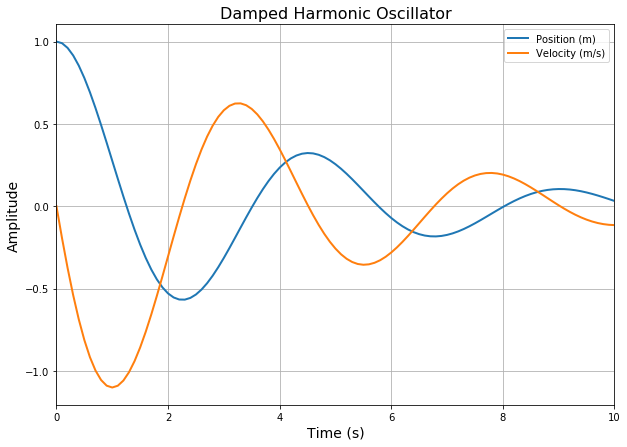

In [3]:
# Set the values of the variables
m = 1
c = 0.5
k = 2
gamma = c/(2*m)
omega0Sq = k/m

# Set the initial value of the position and velocity
X0 = [1, 0]  # pos = 1, vel = 0

# Set Time Specs
tSpan = (0, 10)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 101)

# Solve the Problem
sol = ivp(dshm, tSpan, X0, args=(gamma, omega0Sq), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2, label='Position (m)')    # Plot the Position (which is the zeroth solution in the solution list)
_ = ax.plot(sol.t, sol.y[1], linewidth=2, label='Velocity (m/s)')  # Plot the Velocity (which is the first solution in the solution list)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('Time (s)',     fontsize=14)
_ = ax.set_ylabel('Amplitude', fontsize=14)
_ = ax.set_title('Damped Harmonic Oscillator', fontsize=16)
_ = ax.grid(True)
_ = ax.legend()

Now, let's instead assume that the mass starts at the origin and is given some initial kick in the positive direction.

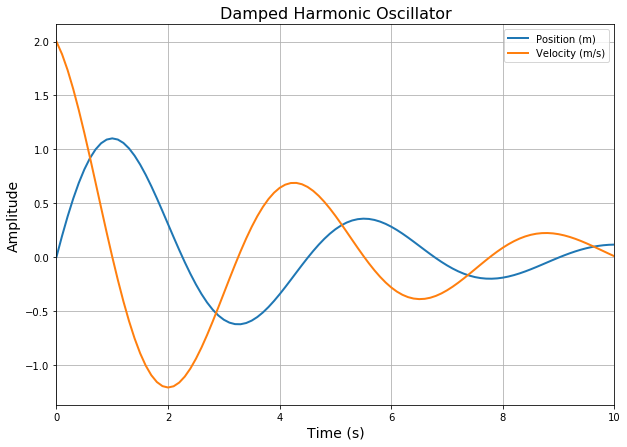

In [4]:
# Set the values of the variables
m = 1
c = 0.5
k = 2
gamma = c/(2*m)
omega0Sq = k/m

# Set the initial value of the position and velocity
X0 = [0, 2]  # pos = 0, vel = 2

# Set Time Specs
tSpan = (0, 10)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 101)

# Solve the Problem
sol = ivp(dshm, tSpan, X0, args=(gamma, omega0Sq), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2, label='Position (m)')    # Plot the Position (which is the zeroth solution in the solution list)
_ = ax.plot(sol.t, sol.y[1], linewidth=2, label='Velocity (m/s)')  # Plot the Velocity (which is the first solution in the solution list)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('Time (s)',     fontsize=14)
_ = ax.set_ylabel('Amplitude', fontsize=14)
_ = ax.set_title('Damped Harmonic Oscillator', fontsize=16)
_ = ax.grid(True)
_ = ax.legend()

Finally, let's take a look at the *critically damped* case when $\gamma = \omega_0$.

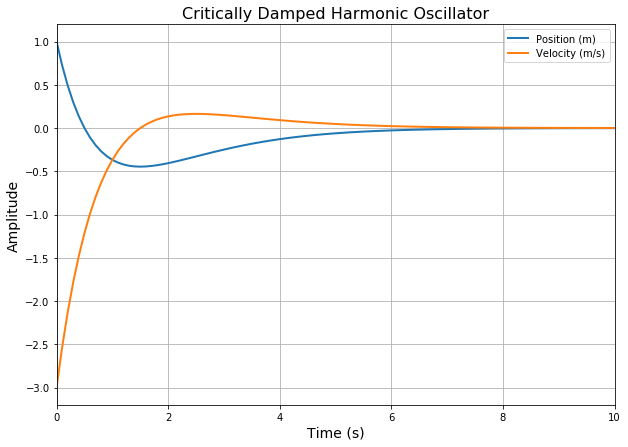

In [5]:
# Set the values of the variables
gamma = 1
omega0 = 1
omega0Sq = omega0**2

# Set the initial value of the position and velocity
X0 = [1, -3]  # pos = 1, vel = -1

# Set Time Specs
tSpan = (0, 10)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 101)

# Solve the Problem
sol = ivp(dshm, tSpan, X0, args=(gamma, omega0Sq), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2, label='Position (m)')    # Plot the Position (which is the zeroth solution in the solution list)
_ = ax.plot(sol.t, sol.y[1], linewidth=2, label='Velocity (m/s)')  # Plot the Velocity (which is the first solution in the solution list)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('Time (s)',     fontsize=14)
_ = ax.set_ylabel('Amplitude', fontsize=14)
_ = ax.set_title('Critically Damped Harmonic Oscillator', fontsize=16)
_ = ax.grid(True)
_ = ax.legend()

You are welcome to play around with the three cells above to see how changing $k$, $m$, $c$ or the initial conditions affects the system.

### Coupled, Damped Harmonic Oscillators

Now, let's consider the case where we have a mass connected to a spring which is attached to the left wall and a spring attached between another mass and the right wall with a spring connecting the two masses in between. We can write the equations of motion for the system as being

\begin{align}
    m_1 \ddot{x}_1 &= -c \dot{x}_1 - k_1 x_1 - k_2 \left( x_1 - x_2 \right) \\
    m_2 \ddot{x}_2 &= -c \dot{x}_2 - k_2 \left( x_2 - x_1 \right) - k_3 x_2
\end{align}

we can then rewrite this as

\begin{align}
    \dot{x}_1 &= v_1 \\
    \dot{x}_2 &= v_2 \\
    \dot{v}_1 &= -2\gamma v_1 - \omega_0^2 x_1 - \omega_0^2 \left( x_1 - x_2 \right) \\
    \dot{v}_2 &= -2\gamma v_2 - \omega_0^2 \left( x_2 - x_1 \right) - \omega_0^2 x_2
\end{align}

assuming $k_1=k_2=k$ and $m_1=m_2=m$.

In [6]:
# The Predator-Prey Equation
def cdhm(t, X, gamma, omega0Sq):
    '''A function for the ODE solver that specifies the conditions for damped, simple harmonic oscillations.'''
    
    # Unpack the variables
    pos1, pos2, vel1, vel2 = X
    
    # Return the Output of the Equations
    return [
        vel1,
        vel2,
        -2*gamma*vel1 - omega0Sq*pos1 - omega0Sq*(pos1 - pos2),
        -2*gamma*vel2 - omega0Sq*(pos2 - pos1) - omega0Sq*pos2
    ]

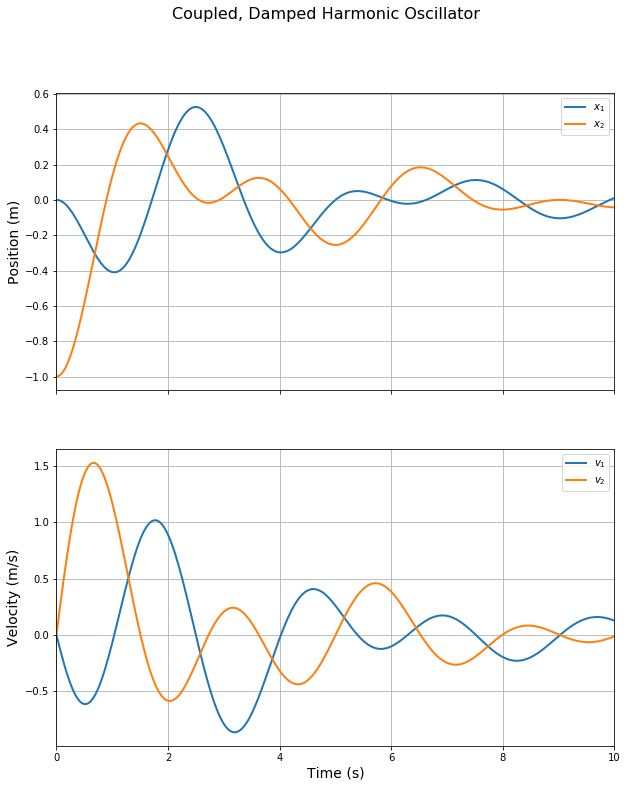

In [7]:
# Set the values of the variables
m = 1
c = 0.5
k = 2
gamma = c/(2*m)
omega0Sq = k/m

# Set the initial value of the position and velocity
X0 = [0, -1, 0, 0]  # pos1 = 1, pos2 = 1.5, vel = 0

# Set Time Specs
tSpan = (0, 10)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 301)

# Solve the Problem
sol = ivp(cdhm, tSpan, X0, args=(gamma, omega0Sq), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
_ = ax[0].plot(sol.t, sol.y[0], linewidth=2, label='$x_1$')  # Plot the Position1 (which is the zeroth solution in the solution list)
_ = ax[0].plot(sol.t, sol.y[1], linewidth=2, label='$x_2$')  # Plot the Position2 (which is the first solution in the solution list)
_ = ax[1].plot(sol.t, sol.y[2], linewidth=2, label='$v_1$')  # Plot the Position1 (which is the zeroth solution in the solution list)
_ = ax[1].plot(sol.t, sol.y[3], linewidth=2, label='$v_2$')  # Plot the Position2 (which is the first solution in the solution list)
_ = ax[0].set_xlim(tSpan)
_ = ax[1].set_xlim(tSpan)
_ = ax[1].set_xlabel('Time (s)',  fontsize=14)
_ = ax[0].set_ylabel('Position (m)',   fontsize=14)
_ = ax[1].set_ylabel('Velocity (m/s)', fontsize=14)
_ = fig.suptitle('Coupled, Damped Harmonic Oscillator', fontsize=16)
_ = ax[0].grid(True)
_ = ax[1].grid(True)
_ = ax[0].legend()
_ = ax[1].legend()

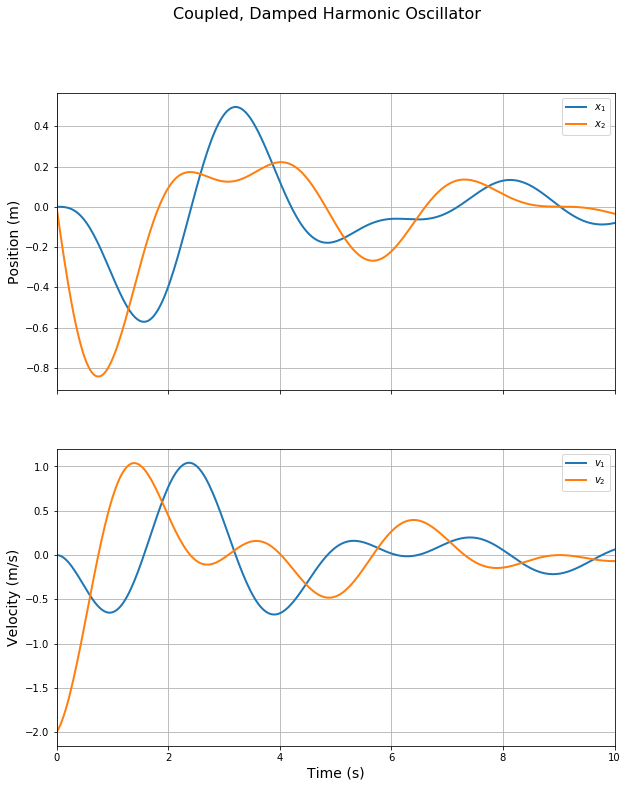

In [8]:
# Set the values of the variables
m = 1
c = 0.5
k = 2
gamma = c/(2*m)
omega0Sq = k/m

# Set the initial value of the position and velocity
X0 = [0, 0, 0, -2]  # pos1 = 1, pos2 = 1.5, vel = 0

# Set Time Specs
tSpan = (0, 10)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 301)

# Solve the Problem
sol = ivp(cdhm, tSpan, X0, args=(gamma, omega0Sq), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
_ = ax[0].plot(sol.t, sol.y[0], linewidth=2, label='$x_1$')  # Plot the Position1 (which is the zeroth solution in the solution list)
_ = ax[0].plot(sol.t, sol.y[1], linewidth=2, label='$x_2$')  # Plot the Position2 (which is the first solution in the solution list)
_ = ax[1].plot(sol.t, sol.y[2], linewidth=2, label='$v_1$')  # Plot the Position1 (which is the zeroth solution in the solution list)
_ = ax[1].plot(sol.t, sol.y[3], linewidth=2, label='$v_2$')  # Plot the Position2 (which is the first solution in the solution list)
_ = ax[0].set_xlim(tSpan)
_ = ax[1].set_xlim(tSpan)
_ = ax[1].set_xlabel('Time (s)',  fontsize=14)
_ = ax[0].set_ylabel('Position (m)',   fontsize=14)
_ = ax[1].set_ylabel('Velocity (m/s)', fontsize=14)
_ = fig.suptitle('Coupled, Damped Harmonic Oscillator', fontsize=16)
_ = ax[0].grid(True)
_ = ax[1].grid(True)
_ = ax[0].legend()
_ = ax[1].legend()

## Assignment

### The Pendulum

The equation of motion for a damped pendulum is

\begin{equation}
    l \ddot{\theta} + c \dot{\theta} + g \sin \theta = 0
\end{equation}

which can be rewritten as

\begin{align}
    \dot{\theta} &= \omega \\
    \dot{\omega} &= -\frac{c}{l} \omega - \frac{g}{l} \sin \theta
\end{align}

Write the function for Scipy below.

In [9]:
def dpen(t, X, c, l, g):
    """Damped Pendulum"""
    
    # Unpack
    theta, omega = X
    
    # Return Solutions
    return [
        omega,
        -(c/l)*omega - (g/l)*np.sin(theta)
    ]

Write the code to solve the equation here for the initial conditions

\begin{align}
    \theta(0) &= \frac{9\pi}{10} \\
    \dot{\theta}(0) &= 0
\end{align}

and when $c=0.5$, $g=9.8$ and $l=1$.

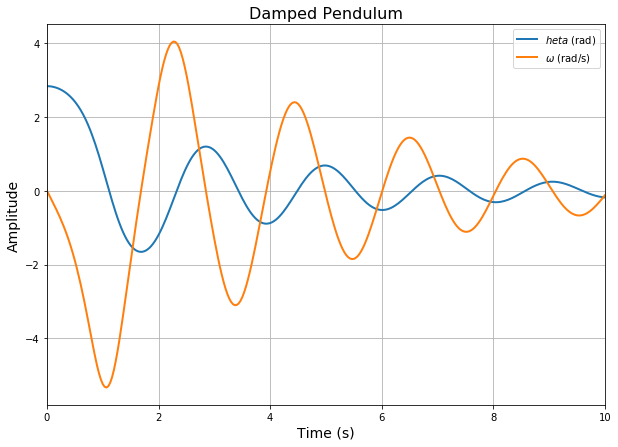

In [17]:
# Set the values of the variables
c = 0.5
g = 9.8
l = 1.0

# Set the initial value of the position and velocity
X0 = [9*np.pi/10, 0]  # pos = 0, vel = 2

# Set Time Specs
tSpan = (0, 10)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 301)

# Solve the Problem
sol = ivp(dpen, tSpan, X0, args=(c, l, g), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2, label='$\theta$ (rad)')    # Plot the Position (which is the zeroth solution in the solution list)
_ = ax.plot(sol.t, sol.y[1], linewidth=2, label='$\omega$ (rad/s)')  # Plot the Velocity (which is the first solution in the solution list)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('Time (s)',     fontsize=14)
_ = ax.set_ylabel('Amplitude', fontsize=14)
_ = ax.set_title('Damped Pendulum', fontsize=16)
_ = ax.grid(True)
_ = ax.legend()

### Coupled Pendulums

In the case when two pendula are connected to each other via a spring, the equations of motion are

\begin{align}
    \ddot{\theta}_1 + \frac{g}{l} \sin \theta_1 + \frac{k}{m} (\theta_1 - \theta_2) &= 0 \\
    \ddot{\theta}_2 + \frac{g}{l} \sin \theta_2 + \frac{k}{m} (\theta_2 - \theta_1) &= 0 \\
\end{align}

which can be written as

\begin{align}
    \dot{\theta}_1 &= \omega_1 \\
    \dot{\theta}_2 &= \omega_2 \\
    \dot{\omega}_1 &= - \frac{g}{l} \sin \theta_1 - \frac{k}{m} (\theta_1 - \theta_2) \\
    \dot{\omega}_2 &= - \frac{g}{l} \sin \theta_2 - \frac{k}{m} (\theta_2 - \theta_1) \\
\end{align}

Write the function for Scipy below.

In [11]:
def cpen(t, X, g, l, k, m):
    """Coupled Pendulums"""
    
    # Unpack
    th1, th2, om1, om2 = X
    
    # Return Solutions
    return [
        om1,
        om2,
        -(g/l)*np.sin(th1) - (k/m)*(th1 - th2),
        -(g/l)*np.sin(th2) - (k/m)*(th2 - th1),
    ]

And write the code to solve the differential equation below for the initial conditions

\begin{align}
    \theta_1(0) &= 0 \\
    \theta_2(0) &= \frac{\pi}{6} \\
    \dot{\theta}_1(0) &= 0 \\
    \dot{\theta}_2(0) &= 0 \\
\end{align}


and when $k=1$, $m=1$, $g=9.8$ and $l=2$.

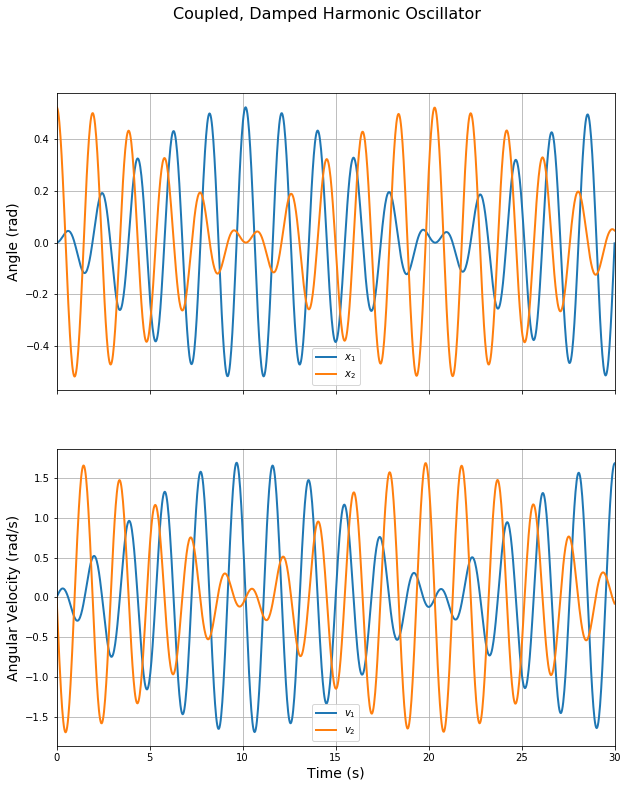

In [25]:
# Set the values of the variables
g = 9.8
l = 1
k = 1
m = 1

# Set the initial value of the position and velocity
X0 = [0, np.pi/6, 0, 0]

# Set Time Specs
tSpan = (0, 30)  # The simulation times for our system
tEval = np.linspace(tSpan[0], tSpan[1], 1001)

# Solve the Problem
sol = ivp(cpen, tSpan, X0, args=(g, l, k, m), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
_ = ax[0].plot(sol.t, sol.y[0], linewidth=2, label='$x_1$')  # Plot the Position1 (which is the zeroth solution in the solution list)
_ = ax[0].plot(sol.t, sol.y[1], linewidth=2, label='$x_2$')  # Plot the Position2 (which is the first solution in the solution list)
_ = ax[1].plot(sol.t, sol.y[2], linewidth=2, label='$v_1$')  # Plot the Position1 (which is the zeroth solution in the solution list)
_ = ax[1].plot(sol.t, sol.y[3], linewidth=2, label='$v_2$')  # Plot the Position2 (which is the first solution in the solution list)
_ = ax[0].set_xlim(tSpan)
_ = ax[1].set_xlim(tSpan)
_ = ax[1].set_xlabel('Time (s)',  fontsize=14)
_ = ax[0].set_ylabel('Angle (rad)',   fontsize=14)
_ = ax[1].set_ylabel('Angular Velocity (rad/s)', fontsize=14)
_ = fig.suptitle('Coupled, Damped Harmonic Oscillator', fontsize=16)
_ = ax[0].grid(True)
_ = ax[1].grid(True)
_ = ax[0].legend()
_ = ax[1].legend()